In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
from time import time
from collections import deque
from random import sample
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

### Settings

In [3]:
sns.set_style('whitegrid')

# Set up results directory
results_path = Path('results', 'trading_bot')
if not results_path.exists():
    results_path.mkdir(parents=True)


### Helper functions
def format_time(t):
    m_, s = divmod(t, 60)
    h, m = divmod(m_, 60)
    return '{:02.0f}:{:02.0f}:{:02.0f}'.format(h, m, s)

## Visualization

### Get Results


In [4]:
# Compile results into a list
file_list = ['results/trading_bot/SPYSimpleTradingCostsTrainResults.csv',
             'results/trading_bot/SPYNoTradingCostSimpleModelTrain.csv',
             #'results/trading_bot/FxTradingCostsTrainResults.csv',
             'results/trading_bot/SPY2022-02-15-Model1TrainResults.csv']

results_list = [pd.read_csv(file) for file in file_list]

local_files = [file.split('/')[-1] for file in file_list]

### Plot Results

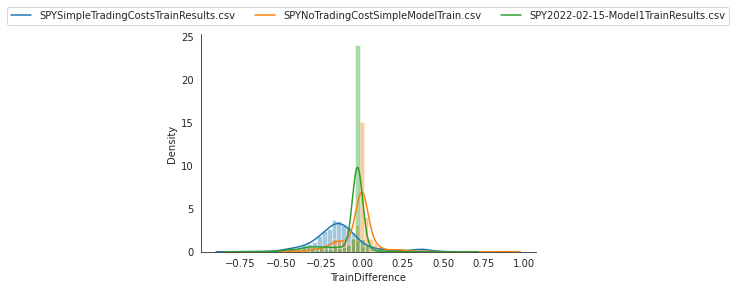

In [5]:
# Plot density histogram
with sns.axes_style('white'):
    for results in results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(file_list))

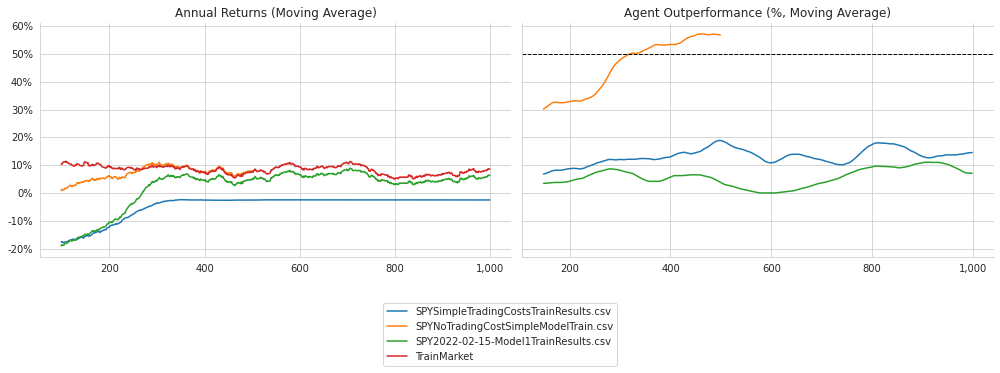

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(results_list)):
    results = results_list[r]
    data = results['TrainAgent']
    
    if r == len(results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    
    df.plot(ax=axes[0],
            title='Annual Returns (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(results_list)):
    results = results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(50)
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')

    
labels=['Model 1','Model 1 (No Trading Cost)','Model 2','Train Market']
    
fig.legend(labels=local_files + ['TrainMarket'], bbox_to_anchor=(0.5, -0.3), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)


